# 0.0 Imports

In [34]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib import pyplot as plt
from IPython.display import      HTML

from sklearn import cluster   as c
from sklearn import metrics   as m

from plotly import express as px


## 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container {width:100% !important;}</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()    

Populating the interactive namespace from numpy and matplotlib


## 0.2. Load Dataset

In [3]:
# load data
df_raw = pd.read_csv('../data/raw/Ecommerce.csv')

df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 1.0. Descrição dos dados

## 1.1. Rename Columns

In [4]:
df1 = df_raw.copy()

In [5]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# Rename Columns
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']

df1.columns = cols_new

df1.sample()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
49960,540540,22442,GROW YOUR OWN FLOWERS SET OF 3,2,7-Jan-17,7.95,17218.0,United Kingdom


In [7]:
df_raw.sample()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
462954,576051,22960,JAM MAKING SET WITH JARS,24,11-Nov-17,3.75,14911.0,EIRE


## 1.2. Data Dimensions

In [8]:
print( 'Number of rows: {}'.format ( df1.shape[0] ) )
print( 'Number of cols: {}'.format ( df1.shape[1] ) )


Number of rows: 541909
Number of cols: 8


## 1.3. Data Types

In [9]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 1.4. Check NA

In [10]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 1.5. Replace NA

In [11]:
# Remove NA
df1 = df1.dropna( subset = ['description','customer_id'])
print( 'Remove data: {:.2f}'.format( 1 - (df1.shape[0]/ df_raw.shape[0]) ))


Remove data: 0.25


In [12]:
df1.shape

(406829, 8)

In [13]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 1.6. Change Dtypes

In [14]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [15]:
# Invoice Date

df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format = '%d-%b-%y')

# Customer Id

df1['customer_id'] = df1['customer_id'].astype(int)

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [16]:
df1['invoice_date'] = pd.to_datetime( df1['invoice_date'], format = '%d-%b-%y')

# Customer Id

df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [17]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## 1.7. Descriptive Statistics

# 2.0. Feature Engineering

In [19]:
df2 = df1.copy()

## 2.1. Feature Creation

In [20]:
df2.head()

# Data Reference

df_ref = df2.drop ( ['invoice_no', 'stock_code', 'description',
                     'quantity', 'invoice_date', 'unit_price', 'country' ],axis = 1).drop_duplicates( ignore_index = True)

df_ref.head()


,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [21]:
# Gross Revenue (Faturamento) -> quantity * price = Faturamento
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id','gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge ( df_ref,df_monetary, on = 'customer_id', how = 'left')

# Recency  - Last day purchase
df_recency = df2[['customer_id','invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge ( df_ref, df_recency, on = 'customer_id', how = 'left' )
df_ref.isna().sum()

# Frequency
df_frequ = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_ref = pd.merge ( df_ref, df_frequ, on = 'customer_id', how = 'left')


df_ref.head()



,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


# 3.0. Filtragem de Variáveis

In [22]:
df3 = df_ref.copy()

# 4.0. Exploratory Data Analysis

In [23]:
df4 = df3.copy()

# 5.0. Data Preparation

In [24]:
df5 = df4.copy()

# 6.0. Feature Selection

In [25]:
df6 = df5.copy()

# 7.0. Hyperparameter Fine-tuning

In [46]:
df7 = df6.copy()



In [47]:
X = df7

In [48]:
# How cluster we needs
clusters = [ 2 , 3 , 4 , 5 , 6 ]

## 7.1. Within-Cluster Sum of Square ( WSS )


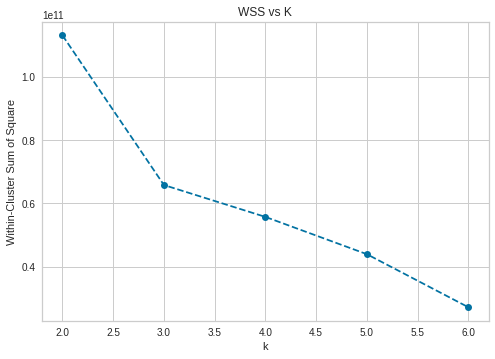

In [49]:
wss = []

for k in clusters:
    # Model Definition
    kmeans = c.KMeans( init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42 )
    
    # Model Training
    kmeans.fit( X )
    
    # Validation
    wss.append(kmeans.inertia_)
    
# Plot wss - Elbow Method
plt.plot ( clusters, wss, linestyle ='--', marker = 'o', color = 'b')
plt.xlabel( 'k');
plt.ylabel( 'Within-Cluster Sum of Square');
plt.title( 'WSS vs K');


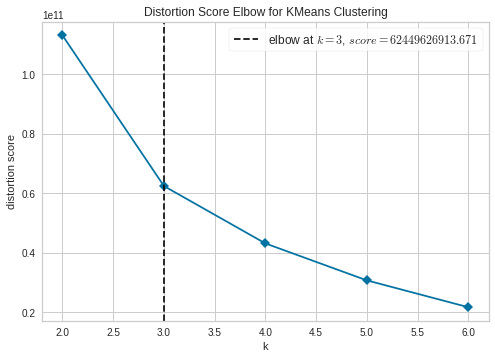

In [50]:
# Other method
from yellowbrick.cluster import KElbowVisualizer

kmeans = KElbowVisualizer( c.KMeans(), k = clusters, timings = False)
kmeans.fit( X )
kmeans.show();

## 7.2. Silhouette Score

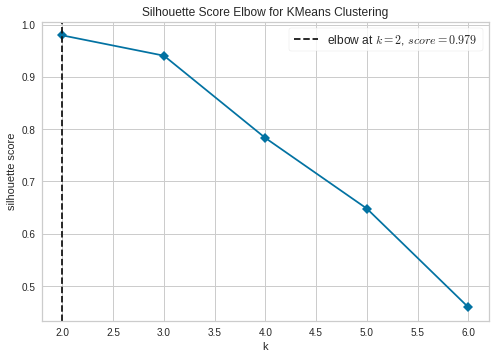

In [51]:
kmeans = KElbowVisualizer( c.KMeans(), k = clusters,metric = 'silhouette' , timings = False)
kmeans.fit( X )
kmeans.show();

# 8.0. Model Training

In [52]:
df8 = df7.copy()

## 8.1. K-Means

In [53]:
# Model Definition
k = 3
kmeans = c.KMeans( init = 'random', n_clusters = k, n_init = 10, max_iter = 300, random_state = 42  )

# Model Training
kmeans.fit(X)

# Clustering
labels  = kmeans.labels_


## 8.2. Cluster Validation

In [54]:
# WSS ( Within-Cluster Sum of Square)
print('WSS value : {}'.format(kmeans.inertia_))

## SS ( Silhouette Score)
print('SS value : {}'.format(m.silhouette_score ( X, labels, metric = 'euclidean')))

WSS value : 65797205671.04392
SS value : 0.9165777704522676


# 9.0. Cluster Analysis

In [55]:
df9 = df8.copy()
df9['cluster'] = labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_no,cluster
0,17850,5288.63,302,35,0
1,13047,3079.10,31,18,0
2,12583,7187.34,2,18,0
3,13748,948.25,95,5,0
4,15100,635.10,330,6,0


## 9.2. Visualization Inspection

In [56]:
df9.columns

Index(['customer_id', 'gross_revenue', 'recency_days', 'invoice_no',
       'cluster'],
      dtype='object')

In [57]:
fig = px.scatter_3d( df9, x = 'recency_days', y = 'invoice_no', z = 'gross_revenue', color = 'cluster')
fig.show()

## 9.3. Cluster Profile

In [67]:
# Number of customer
df_cluster = df9[['customer_id','cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['pec_customer'] = 100*(df_cluster['customer_id']/df_cluster['customer_id'].sum())

# Average gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how = 'inner', on = 'cluster')

# Average recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how = 'inner', on = 'cluster')

# Average invoice_no
df_avg_invoice_no = df9[['invoice_no', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_invoice_no, how = 'inner', on = 'cluster')

df_cluster.head()

,cluster,customer_id,pec_customer,gross_revenue,recency_days,invoice_no
0,0,4335,99.153705,1372.578747,92.257901,4.614533
1,1,6,0.137237,182181.981667,7.166667,89.000000
2,2,31,0.709058,40543.517742,13.290323,53.290323


### Cluster 01:  ( Candidato a Insider )
 
 - Número de customer: 6 (0.13% dos customers)
 - Recência em média: 7 dias
 - Compras em média: 89 compras
 - Receita em média: $ 182.181,00.
 
### Cluster 02:  
 
 - Número de customer: 31 (0.7% dos customers)
 - Recência em média: 14 dias
 - Compras em média: 53 compras
 - Receita em média: $ 40.543,00.
 
 ### Cluster 03: 
 
 - Número de customer: 4.335 (99% dos customers)
 - Recência em média: 92 dias
 - Compras em média: 05 compras
 - Receita em média: $ 1.372,57.

# 10.0. Deploy to Production

In [33]:
df10 = df9.copy()